# Distribuciones de forma anillo

In [3]:
from math import sin, cos, radians, pi, sqrt
import numpy.random as rnd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def ring(r_min=0, r_max=1,n_samples=360):
    angle = rnd.uniform(0, 2*pi, n_samples) # radianes
    distance = rnd.uniform(r_min, r_max, n_samples)
    data=[]
    for a, d in zip(angle, distance):
        data.append([d*cos(a), d*sin(a)])
    return np.array(data)

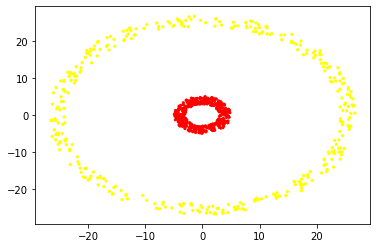

In [12]:
data1 = ring(3,5)
data2 = ring(24,27)
data = np.concatenate([data1, data2], axis=0)
labels=np.concatenate([[0 for i in range(len(data1))], [1 for i in range(len(data2))]])
plt.scatter(data[:,0], data[:,1], c=labels, s=5, cmap="autumn")
plt.show()

# K-means

In [13]:
from sklearn.cluster import KMeans

In [14]:
km = KMeans(2).fit(data)

In [15]:
clust = km.predict(data)

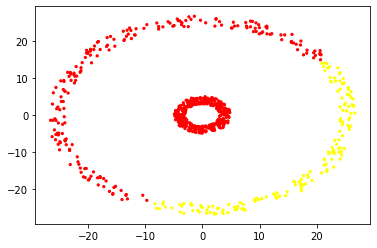

In [16]:
plt.scatter(data[:,0],data[:,1],c=clust,s=5,cmap="autumn")

# K-medoides

In [18]:
from pyclust import KMedoids

In [19]:
kmed = KMedoids(2).fit_predict(data)

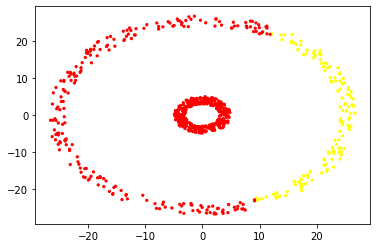

In [20]:
plt.scatter(data[:,0],data[:,1],c=kmed,s=5,cmap="autumn")

# Clustering espectral

In [21]:
from sklearn.cluster import SpectralClustering

In [22]:
clust = SpectralClustering(2).fit_predict(data)

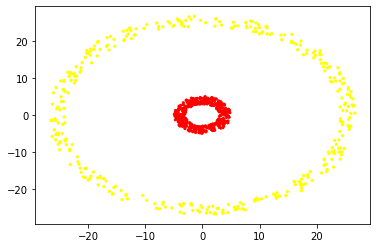

In [23]:
plt.scatter(data[:,0],data[:,1],c=clust,s=5,cmap="autumn")

# Resumen Clustering

* Podemos estimar K:
    * No: Propagación de la afinidad
    * Si: Podemos usar distancia euclidea:
        * Si: K-means
        * No: Buscar valores centrales:
            * Si: K-medoides
            * No: Los datos son linealmente separables:
                * Si: Clustering Aglomerativo
                * No: Clustering Espectral